In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal.

In [24]:
def xrms(N,x): #Entregar N como entero, x como array. N debe ser la cantidad de elementos de x.
    c=0
    for i in range(N):
        rms=x[i]**2
        c=c+rms
    xrms=((1/N)*c)**(1/2)
    return xrms


In [27]:
#Lectura de los datos
data=scipy.io.loadmat('signals.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015',
 '__version__': '1.0',
 '__globals__': [],
 'Fs': array([[1024]], dtype=uint16),
 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
         4365.31103516, 4370.91796875]]),
 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
         -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]),
 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
         220.4135886 , 151.5810508 ]]),
 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
         -539.9349533 , -772.65519631]]),
 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
         1416.109375  , 1352.75012207]]),
 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
         -3791.24267578, -3924.6550293 , -4109.94433594]])}

A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector tiempo.

In [62]:
#Vector tiempo
Fs=data['Fs'][0][0] #frec de muestreo
N=np.shape(data['ECG_asRecording'])[1] #cantidad de muestras
t=np.linspace(0,(N/Fs)*60,N) #vector, de 0 a 30min, dividido en la cantidad de muestras

30720

Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y desciba cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

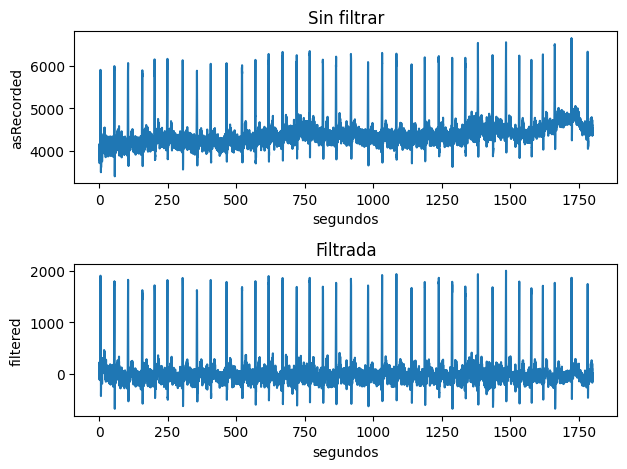

In [70]:
plt.subplot(211) #Señal sin filtro
plt.plot(t,data['ECG_asRecording'][0])
plt.title('Sin filtrar')
plt.xlabel('segundos')
plt.ylabel('asRecorded')
plt.subplot(212) #señal con filtro
plt.plot(t,data['ECG_filtered'][0],label='Filtrada')
plt.title('Filtrada')
plt.xlabel('segundos')
plt.ylabel('filtered')
plt.tight_layout()

[AQUÍ VIENE LA EXPLICACIÓN DEL PUNTO]

Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

Promedio: 4117.31206346284, RMS: 4127.435848292779, Varianza: 83468.05383574814, Desv. Estándar: 288.90838311781147


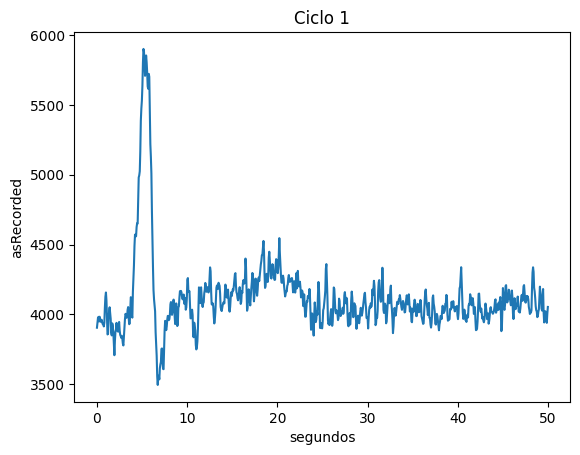

In [99]:
asRecorded=data['ECG_asRecording'][0]
ciclo1=asRecorded[0:854] #por ahora, digamos que cada ciclo son 854 mediciones -->50 segundos
tciclo=t[0:854]
plt.plot(tciclo,ciclo1)
plt.title('Ciclo 1')
plt.xlabel('segundos')
plt.ylabel('asRecorded')
mean_ciclo1=np.mean(ciclo1) #promedio
rms_ciclo1=xrms(np.shape(tciclo)[0],ciclo1) #rms
var_ciclo1=np.var(ciclo1) #varianza
std_ciclo1=np.std(ciclo1) #desv estandar
print(f'Promedio: {mean_ciclo1}, RMS: {rms_ciclo1}, Varianza: {var_ciclo1}, Desv. Estándar: {std_ciclo1}')

Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.

Promedio: 86.54911385447427, RMS: 319.10590186975094, Varianza: 94337.8274991122, Desv. Estándar: 307.1446361229709


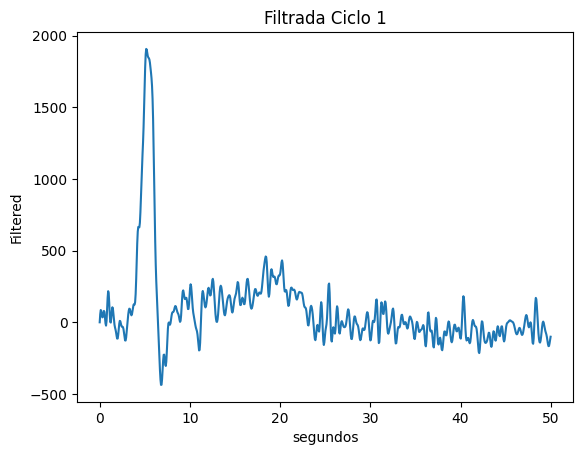

In [100]:
filtered=data['ECG_filtered'][0]
filtered_ciclo1=filtered[0:854] 
plt.plot(tciclo,filtered_ciclo1)
plt.title('Filtrada Ciclo 1')
plt.xlabel('segundos')
plt.ylabel('Filtered')
mean_filtered_ciclo1=np.mean(filtered_ciclo1) #promedio
rms_filtered_ciclo1=xrms(np.shape(tciclo)[0],filtered_ciclo1) #rms
var_filtered_ciclo1=np.var(filtered_ciclo1) #varianza
std_filtered_ciclo1=np.std(filtered_ciclo1) #desv estandar
print(f'Promedio: {mean_filtered_ciclo1}, RMS: {rms_filtered_ciclo1}, Varianza: {var_filtered_ciclo1}, Desv. Estándar: {std_filtered_ciclo1}')

In [ ]:
#aqui viene la comparación. No sé si hacerlo en celda de código o de texto. En cualquier caso, este es el espacio.

Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo y analice (grafica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?